In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\JaneRose\anaconda3\envs\myenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataframe = pd.read_csv("D:/10XAcademy/TelecomUser_DataAnalysis/data/Week1_challenge_data_source.csv")
# dropping NaN values from session bearer id
dataframe.dropna(subset=["Bearer Id"],inplace=True)
id_columns = ["IMEI","MSISDN/Number","IMSI","Bearer Id"]
dataframe.shape

(149010, 55)

In [3]:
num_col_list = list(dataframe.select_dtypes(exclude=['object']).columns)
col_list = [item for item in num_col_list if item not in id_columns]
upper_lim={}
lower_lim={}
for col in col_list:
    q1 = np.percentile(dataframe[col],25,method='midpoint')
    q3 = np.percentile(dataframe[col],75, method = 'midpoint')
    IQR = q3 - q1
    upper_lim = np.where(dataframe[col]>=(q3+1.5*IQR))
    lower_lim = np.where(dataframe[col]<=(q1-1.5*IQR))
dataframe.drop(upper_lim[0],inplace=True)
dataframe.drop(lower_lim[0],inplace=True)
dataframe.shape

(149010, 55)

In [4]:
# determining how well each column depends on another column
round(dataframe.drop(columns=id_columns,axis=1).corr(),4)

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
Start ms,1.0000,0.1219,0.0014,0.0027,-0.0021,-0.0004,-0.0012,0.0000,-0.0036,0.0005,...,-0.0015,0.0011,-0.0024,-0.0026,-0.0045,-0.0022,-0.0036,0.0038,-0.0002,-0.0046
End ms,0.1219,1.0000,-0.0013,-0.0041,-0.0025,0.0009,0.0010,0.0047,-0.0034,-0.0036,...,-0.0035,-0.0037,0.0041,-0.0013,-0.0046,0.0011,0.0026,0.0028,-0.0008,-0.0046
Dur. (ms),0.0014,-0.0013,1.0000,-0.0497,-0.0029,-0.1662,-0.1145,0.0181,0.0063,0.1975,...,0.0038,0.0022,-0.0017,-0.0056,0.0007,0.0016,-0.0004,0.0014,-0.0010,0.0007
Avg RTT DL (ms),0.0027,-0.0041,-0.0497,1.0000,0.0077,-0.0208,-0.0099,-0.0041,-0.0018,-0.0100,...,-0.0019,0.0059,-0.0009,-0.0051,-0.0030,-0.0090,-0.0018,0.0024,-0.0019,-0.0031
Avg RTT UL (ms),-0.0021,-0.0025,-0.0029,0.0077,1.0000,0.0543,0.0428,0.0256,0.0352,-0.0508,...,-0.0020,0.0015,-0.0005,0.0004,0.0029,0.0027,-0.0001,-0.0011,0.0020,0.0028
Avg Bearer TP DL (kbps),-0.0004,0.0009,-0.1662,-0.0208,0.0543,1.0000,0.5578,0.0969,0.0154,-0.6047,...,0.0026,-0.0032,0.0052,0.0036,-0.0015,0.0019,0.0068,0.0016,0.0017,-0.0013
Avg Bearer TP UL (kbps),-0.0012,0.0010,-0.1145,-0.0099,0.0428,0.5578,1.0000,0.0653,0.0357,-0.4020,...,0.0058,-0.0014,0.0063,0.0013,-0.0006,0.0006,0.0064,-0.0008,0.0001,-0.0003
TCP DL Retrans. Vol (Bytes),0.0000,0.0047,0.0181,-0.0041,0.0256,0.0969,0.0653,1.0000,0.0095,-0.2215,...,-0.0124,-0.0030,-0.0038,0.0028,-0.0033,0.0081,0.0103,-0.0005,0.0032,-0.0038
TCP UL Retrans. Vol (Bytes),-0.0036,-0.0034,0.0063,-0.0018,0.0352,0.0154,0.0357,0.0095,1.0000,-0.0071,...,-0.0007,0.0014,0.0066,-0.0041,-0.0032,0.0038,-0.0060,-0.0047,-0.0020,-0.0030
DL TP < 50 Kbps (%),0.0005,-0.0036,0.1975,-0.0100,-0.0508,-0.6047,-0.4020,-0.2215,-0.0071,1.0000,...,-0.0008,-0.0005,-0.0026,-0.0039,0.0001,-0.0005,-0.0053,0.0008,-0.0022,0.0001


In [5]:
# statistical properties of the dataset
dataframe.drop(columns=id_columns,axis=1).describe()

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,149010.000000,149010.000000,1.490100e+05,121325.000000,121344.000000,149010.000000,149010.000000,6.110400e+04,5.264200e+04,148294.000000,...,1.490100e+05,1.490100e+05,1.490100e+05,1.490100e+05,1.490100e+05,1.490100e+05,1.490100e+05,1.490100e+05,1.490100e+05,1.490100e+05
mean,499.146628,498.695289,1.049662e+05,106.102460,17.663263,13310.999698,1770.812543,2.094485e+07,7.686803e+05,92.856137,...,1.163297e+07,1.100971e+07,1.162594e+07,1.100272e+07,4.220918e+08,8.289958e+06,4.211425e+08,8.263137e+06,4.112240e+07,4.546890e+08
std,288.624549,288.098495,8.106465e+04,586.063286,84.871480,24007.834499,4627.336573,1.828608e+08,2.663069e+07,13.040072,...,6.711143e+06,6.345362e+06,6.724897e+06,6.358528e+06,2.439995e+08,4.781851e+06,2.431763e+08,4.768275e+06,1.127729e+07,2.441726e+08
min,0.000000,0.000000,7.142000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.800625e+04,32.000000,2.000000,43.000000,47.000000,3.565175e+04,4.648250e+03,91.000000,...,5.833081e+06,5.518144e+06,5.777596e+06,5.477491e+06,2.105525e+08,4.131098e+06,2.103182e+08,4.145057e+06,3.322168e+07,2.431677e+08
50%,499.000000,500.000000,8.639900e+04,45.000000,5.000000,63.000000,62.000000,5.746185e+05,2.098550e+04,100.000000,...,1.161308e+07,1.101267e+07,1.163991e+07,1.099950e+07,4.235023e+08,8.292174e+06,4.218100e+08,8.266852e+06,4.114406e+07,4.559989e+08
75%,749.000000,749.750000,1.327870e+05,69.000000,15.000000,19760.750000,1119.000000,3.792759e+06,8.438675e+04,100.000000,...,1.744772e+07,1.651540e+07,1.746872e+07,1.650573e+07,6.332618e+08,1.243244e+07,6.316719e+08,1.237965e+07,4.903451e+07,6.657573e+08
max,999.000000,999.000000,1.859336e+06,96923.000000,7120.000000,378160.000000,58613.000000,4.294426e+09,2.908226e+09,100.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [6]:
# non-graphical dispersion analysis of each quantitative variable using variance
print("Dispersion Analysis")
for col in col_list:
    print(col+" : ",dataframe.drop(columns=id_columns,axis=1).loc[:,col].var())

Dispersion Analysis
Start ms :  83304.13041715701
End ms :  83000.74256986387
Dur. (ms) :  6571478279.772185
Avg RTT DL (ms) :  343470.1747660539
Avg RTT UL (ms) :  7203.168106886389
Avg Bearer TP DL (kbps) :  576376117.331545
Avg Bearer TP UL (kbps) :  21412243.763239298
TCP DL Retrans. Vol (Bytes) :  3.343807457331313e+16
TCP UL Retrans. Vol (Bytes) :  709193914233318.9
DL TP < 50 Kbps (%) :  170.04348708020035
50 Kbps < DL TP < 250 Kbps (%) :  38.530817144480615
250 Kbps < DL TP < 1 Mbps (%) :  17.323801772056335
DL TP > 1 Mbps (%) :  23.34855008427566
UL TP < 10 Kbps (%) :  21.542016547106687
10 Kbps < UL TP < 50 Kbps (%) :  10.42401063057216
50 Kbps < UL TP < 300 Kbps (%) :  2.6537969862298665
UL TP > 300 Kbps (%) :  1.6853384034867505
HTTP DL (Bytes) :  9.377358403665783e+17
HTTP UL (Bytes) :  387183778636367.75
Activity Duration DL (ms) :  32613496524872.22
Activity Duration UL (ms) :  21673487345466.55
Dur. (ms).1 :  6571476616548063.0
Nb of sec with 125000B < Vol DL :  6499024

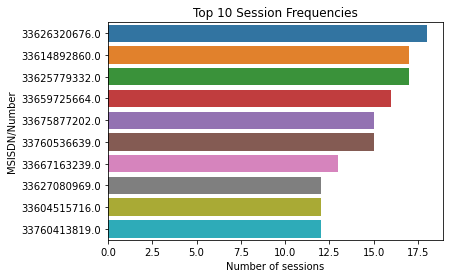

In [7]:
df_frequency = dataframe["MSISDN/Number"].value_counts().head(10)
id_freq = pd.Series(df_frequency.index, dtype="string")
session_frequency = sns.barplot(x=df_frequency.values, y=id_freq, orient='h')
session_frequency.set(title="Top 10 Session Frequencies",xlabel="Number of sessions", ylabel = "MSISDN/Number")
plt.show()

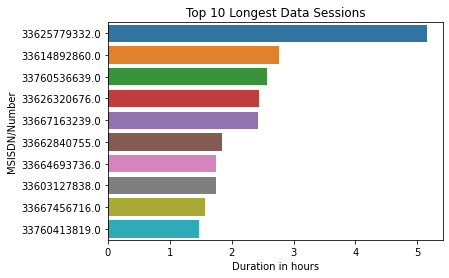

In [8]:
df_duration = dataframe.groupby(["MSISDN/Number"]).sum()["Dur. (ms)"].sort_values(ascending=False).head(10)
id_dur = pd.Series(df_duration.index, dtype="string")
session_durations = sns.barplot(x=df_duration.apply(lambda x:x/3600000).values,y=id_dur, orient='h')
session_durations.set(title = "Top 10 Longest Data Sessions", xlabel="Duration in hours", ylabel = "MSISDN/Number")
plt.show()

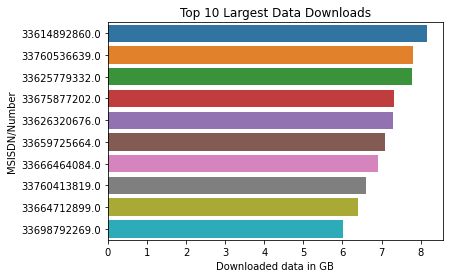

In [9]:
df_session_DL_data = dataframe.groupby(["MSISDN/Number"]).sum()["Total DL (Bytes)"].sort_values(ascending=False).head(10)
id_DL = pd.Series(df_session_DL_data.index, dtype="string")
session_DL = sns.barplot(x=df_session_DL_data.apply(lambda x:x/10**9).values,y=id_DL, orient='h')
session_DL.set(title = "Top 10 Largest Data Downloads", xlabel="Downloaded data in GB", ylabel = "MSISDN/Number")
plt.show()

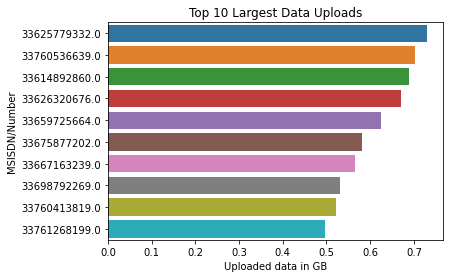

In [10]:
df_session_UL_data = dataframe.groupby(["MSISDN/Number"]).sum()["Total UL (Bytes)"].sort_values(ascending=False).head(10)
id_UL = pd.Series(df_session_UL_data.index, dtype="string")
session_DL = sns.barplot(x=df_session_UL_data.apply(lambda x:x/10**9).values,y=id_UL, orient='h')
session_DL.set(title = "Top 10 Largest Data Uploads", xlabel="Uploaded data in GB", ylabel = "MSISDN/Number")
plt.show()

Text(0.5, 1.0, 'Normalized data')

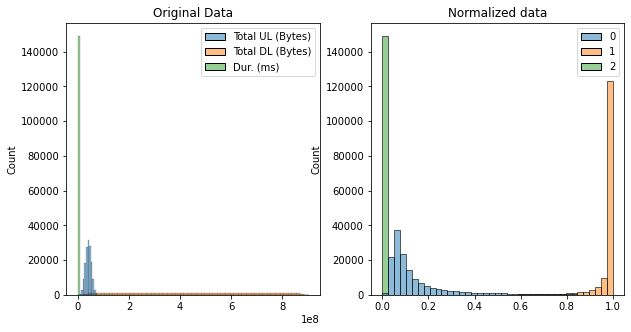

In [32]:
from sklearn.preprocessing import Normalizer
engage_metric_data = dataframe[["Total UL (Bytes)","Total DL (Bytes)","Dur. (ms)"]].dropna()
norm = Normalizer()
normalized_data = norm.fit_transform(engage_metric_data)
# plot both together to compare
fig, ax=plt.subplots(1,2, figsize=(10,5))
sns.histplot(engage_metric_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(normalized_data, ax=ax[1])
ax[1].set_title("Normalized data") 

KeyError: "None of [Float64Index([33664962239.0, 33681854413.0, 33760627129.0, 33750343200.0,\n              33699795932.0, 33668185951.0, 33665368271.0, 33763490140.0,\n              33698743617.0, 33659219748.0,\n              ...\n              33761274518.0, 33762146363.0, 33761274518.0, 33626114091.0,\n              33645655643.0, 33668648496.0, 33650688697.0, 33663449963.0,\n              33621890103.0, 33619622058.0],\n             dtype='float64', length=148506)] are in the [columns]"

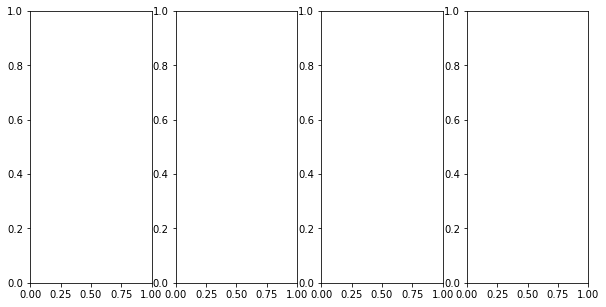

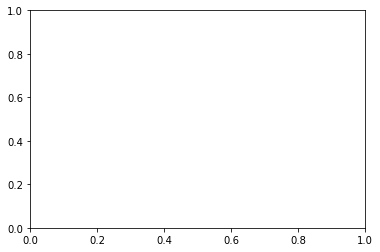

In [37]:
from sklearn.cluster import KMeans
k_cluster = KMeans(n_clusters=3)
k_cluster.fit(engage_metric_data)
cluster_groups = k_cluster.predict(engage_metric_data)
fig, ax=plt.subplots(1,4, figsize=(10,5))
dataframe.plot(kind='scatter',x=dataframe["MSISDN/Number"].dropna(),y=engage_metric_data["Total DL (Bytes)"])
ax[0].set_title("Original Data")
plt.scatter(x=dataframe["MSISDN/Number"],y=cluster_groups)
ax[1].set_title("Clustered Data")